# Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Combine all data into one dataframe

In [2]:
resale_list = ['resale1999.csv','resale2000.csv','resale2012.csv','resale2015.csv','resale2017.csv']

In [3]:
resale_df_list = [pd.read_csv(i) for i in resale_list]


In [4]:
resale = pd.concat(resale_df_list, ignore_index=True)

In [5]:
resale.to_csv("resale_raw.csv", index = False)

# Add remaining_lease columns to data that don't have them
# Also adding year date and month columns

In [6]:
resale = resale.drop(columns=["remaining_lease"])


In [7]:
resale['year'] = pd.DatetimeIndex(pd.to_datetime(resale['month'])).year


In [8]:
resale['date'] = pd.DatetimeIndex(pd.to_datetime(resale['month']))


In [9]:
resale['month'] = pd.DatetimeIndex(pd.to_datetime(resale['month'])).month


In [10]:
resale["remaining_lease"] = (resale['lease_commence_date'] + 99) - resale['year']


In [11]:
cols = list(resale)
cols.insert(0, cols.pop(cols.index("year")))
cols.insert(0, cols.pop(cols.index("date")))
resale = resale.loc[:, cols]

print(resale.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896646 entries, 0 to 896645
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date                 896646 non-null  datetime64[ns]
 1   year                 896646 non-null  int64         
 2   month                896646 non-null  int64         
 3   town                 896646 non-null  object        
 4   flat_type            896646 non-null  object        
 5   block                896646 non-null  object        
 6   street_name          896646 non-null  object        
 7   storey_range         896646 non-null  object        
 8   floor_area_sqm       896646 non-null  float64       
 9   flat_model           896646 non-null  object        
 10  lease_commence_date  896646 non-null  int64         
 11  resale_price         896646 non-null  float64       
 12  remaining_lease      896646 non-null  int64         
dtypes: datetime64[

In [12]:
resale.to_csv("resale.csv", index=False)

In [13]:
resale

,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01-01,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86
1,1990-01-01,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86
2,1990-01-01,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86
3,1990-01-01,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86
4,1990-01-01,1990,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
896641,2023-04-01,2023,4,YISHUN,5 ROOM,342A,YISHUN RING RD,01 TO 03,113.0,Premium Apartment,2016,680000.0,92
896642,2023-04-01,2023,4,YISHUN,5 ROOM,644,YISHUN ST 61,07 TO 09,123.0,Improved,1988,628888.0,64
896643,2023-04-01,2023,4,YISHUN,5 ROOM,872,YISHUN ST 81,01 TO 03,127.0,Improved,1988,640000.0,64
896644,2023-04-01,2023,4,YISHUN,EXECUTIVE,258,YISHUN ST 22,01 TO 03,154.0,Maisonette,1985,808000.0,61


In [14]:
house = resale.groupby(["town", "block", "street_name"]).size().reset_index(name='count').sort_values("count", ascending = False)
house = house.reset_index(drop = True)
house

,town,block,street_name,count
0,JURONG WEST,211,BOON LAY PL,809
1,JURONG WEST,185,BOON LAY AVE,762
2,JURONG WEST,208,BOON LAY PL,757
3,JURONG WEST,186,BOON LAY AVE,752
4,JURONG WEST,210,BOON LAY PL,734
...,...,...,...,...
9724,ANG MO KIO,702,ANG MO KIO AVE 8,1
9725,ANG MO KIO,226F,ANG MO KIO AVE 1,1
9726,BUKIT MERAH,165,BT MERAH CTRL,1
9727,CLEMENTI,516,WEST COAST RD,1


# Combining the top three blocks of each town with the most flats

In [15]:
tamp_house = house[(house.town == "TAMPINES")]
tamp_house.head(1)

,town,block,street_name,count
21,TAMPINES,267,TAMPINES ST 21,426


In [16]:
bedok_house = house[(house.town == "BEDOK")]
bedok_house.head(1)

,town,block,street_name,count
8,BEDOK,534,BEDOK NTH ST 3,569


In [17]:
                    
yishun_house = house[(house.town == "YISHUN")]
yishun_house.head(1)

,town,block,street_name,count
16,YISHUN,107,YISHUN RING RD,455


In [18]:
blk = resale[((resale.town == "TAMPINES") & (resale.block == "267") & (resale.street_name == "TAMPINES ST 21")) |
             ((resale.town == "BEDOK") & (resale.block == "534") & (resale.street_name == "BEDOK NTH ST 3")) |
             ((resale.town == "YISHUN") & (resale.block == "107") & (resale.street_name == "YISHUN RING RD"))]

blk

,date,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
152,1990-01-01,1990,1,BEDOK,2 ROOM,534,BEDOK NTH ST 3,13 TO 15,45.0,IMPROVED,1986,26000.0,95
1225,1990-01-01,1990,1,TAMPINES,3 ROOM,267,TAMPINES ST 21,07 TO 09,79.0,MODEL A,1983,52000.0,92
1460,1990-01-01,1990,1,YISHUN,3 ROOM,107,YISHUN RING RD,04 TO 06,67.0,NEW GENERATION,1982,33000.0,91
1615,1990-02-01,1990,2,BEDOK,2 ROOM,534,BEDOK NTH ST 3,07 TO 09,45.0,IMPROVED,1986,31200.0,95
2247,1990-02-01,1990,2,TAMPINES,3 ROOM,267,TAMPINES ST 21,10 TO 12,79.0,MODEL A,1983,45000.0,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889483,2022-12-01,2022,12,YISHUN,3 ROOM,107,YISHUN RING RD,07 TO 09,67.0,New Generation,1982,360000.0,59
891526,2023-01-01,2023,1,TAMPINES,3 ROOM,267,TAMPINES ST 21,04 TO 06,79.0,Model A,1983,412000.0,59
891531,2023-01-01,2023,1,TAMPINES,3 ROOM,267,TAMPINES ST 21,10 TO 12,75.0,Model A,1983,432000.0,59
891535,2023-01-01,2023,1,TAMPINES,3 ROOM,267,TAMPINES ST 21,04 TO 06,75.0,Model A,1983,410000.0,59


# Linear regression

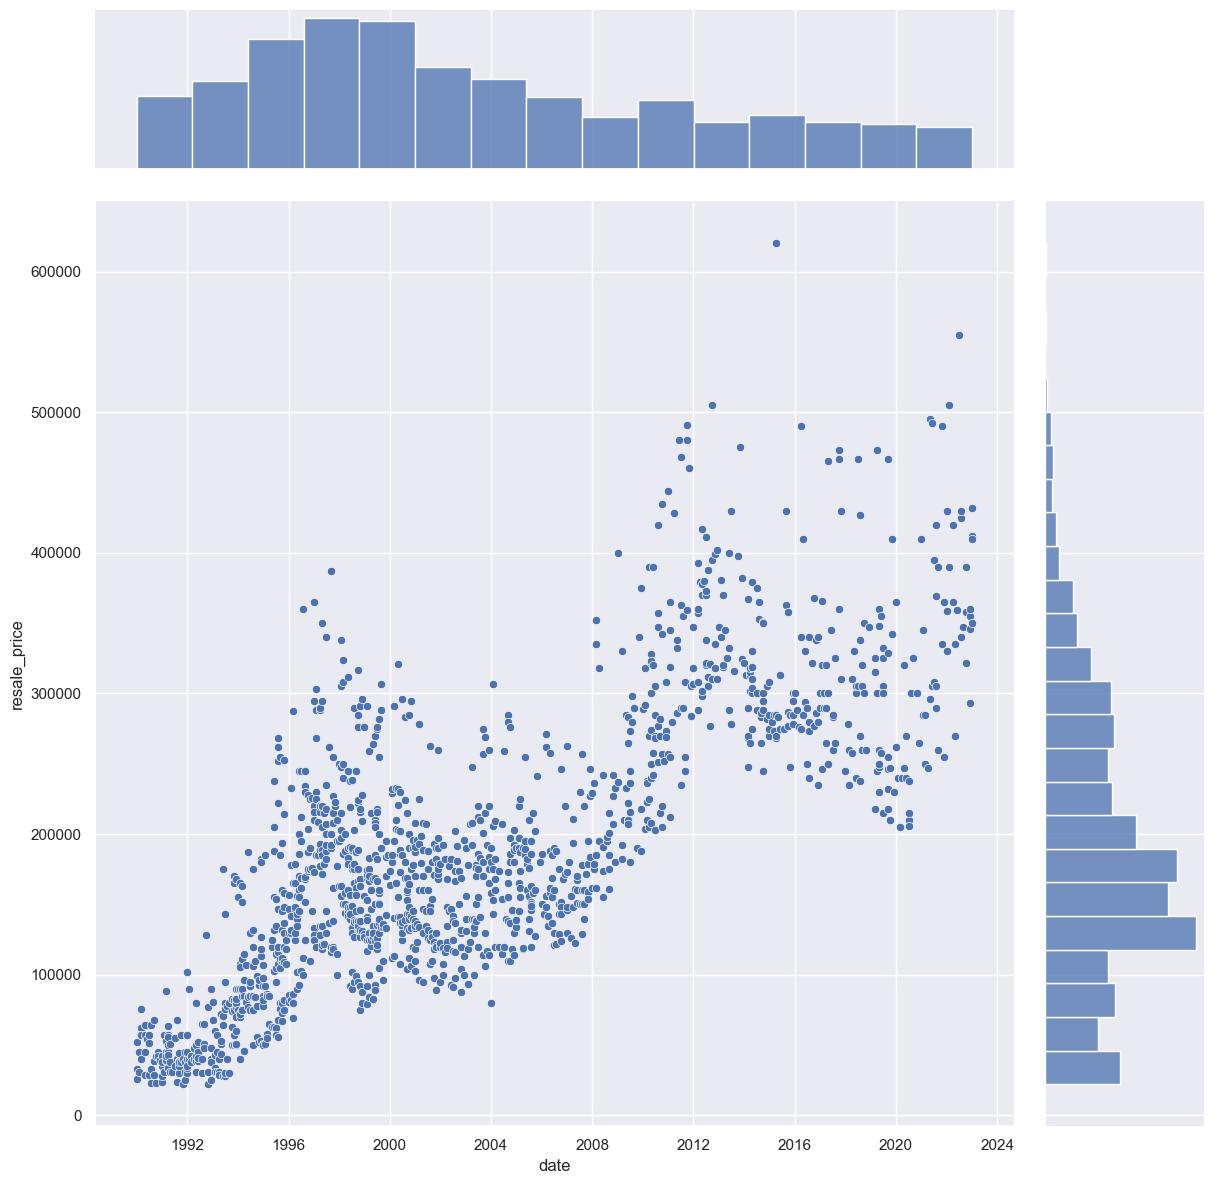

In [19]:
sb.jointplot(data = blk, x = "date", y = "resale_price", height = 12)

In [20]:
blkcopy = blk.copy()
blkcopy['date'] = pd.to_numeric(blkcopy['date'], errors='coerce')
corr = blkcopy['resale_price'].corr(blkcopy['date'])
corr

0.7814192448297669

In [21]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

In [22]:
from sklearn.model_selection import train_test_split

y = pd.DataFrame(blkcopy['resale_price'])
X = pd.DataFrame(blkcopy['date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (1160, 1) (1160, 1)
Test Set  : (290, 1) (290, 1)


In [23]:
linreg.fit(X_train, y_train)

LinearRegression()

In [24]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [-115110.3082775]
Coefficients 	: a =  [[2.9020335e-13]]


# Regression Line

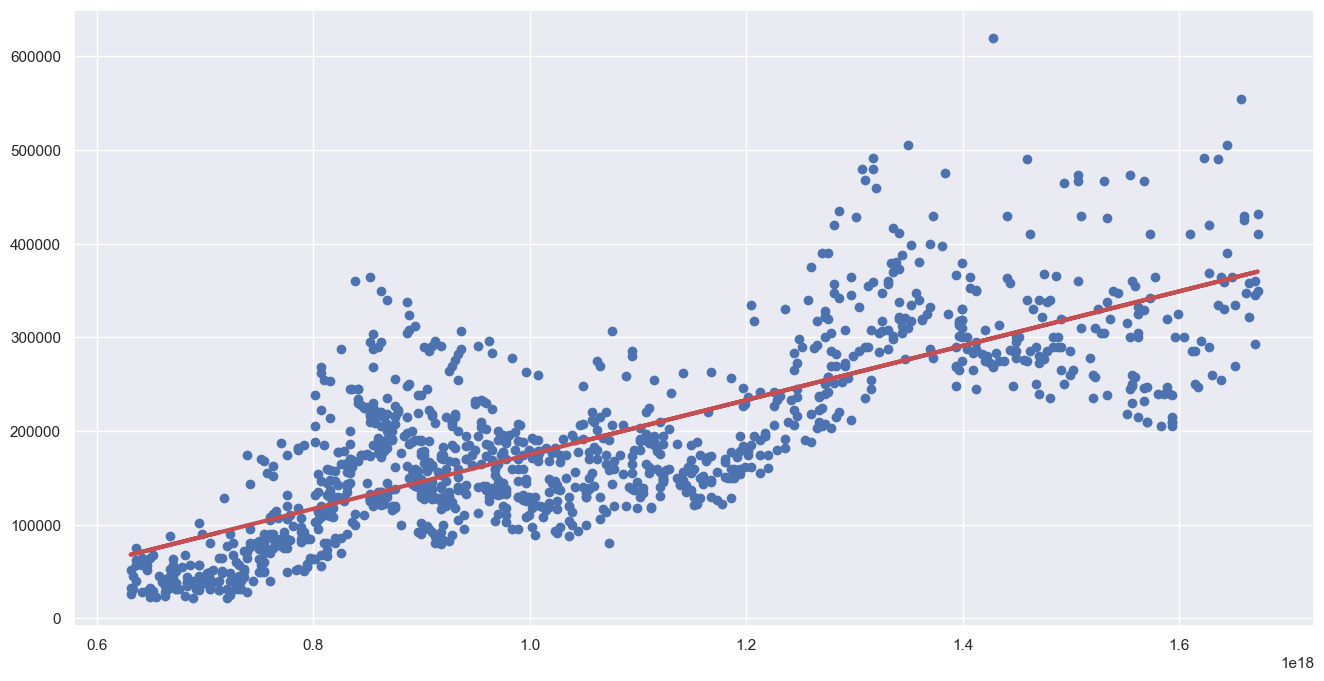

In [25]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Explained Variance and Mean Squared Error

In [26]:
from sklearn.metrics import mean_squared_error

y_train_pred = linreg.predict(X_train)

print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Explained Variance (R^2) 	: 0.6077332700723829
Mean Squared Error (MSE) 	: 3921225347.62952


In [27]:
y_test_pred = linreg.predict(X_test)

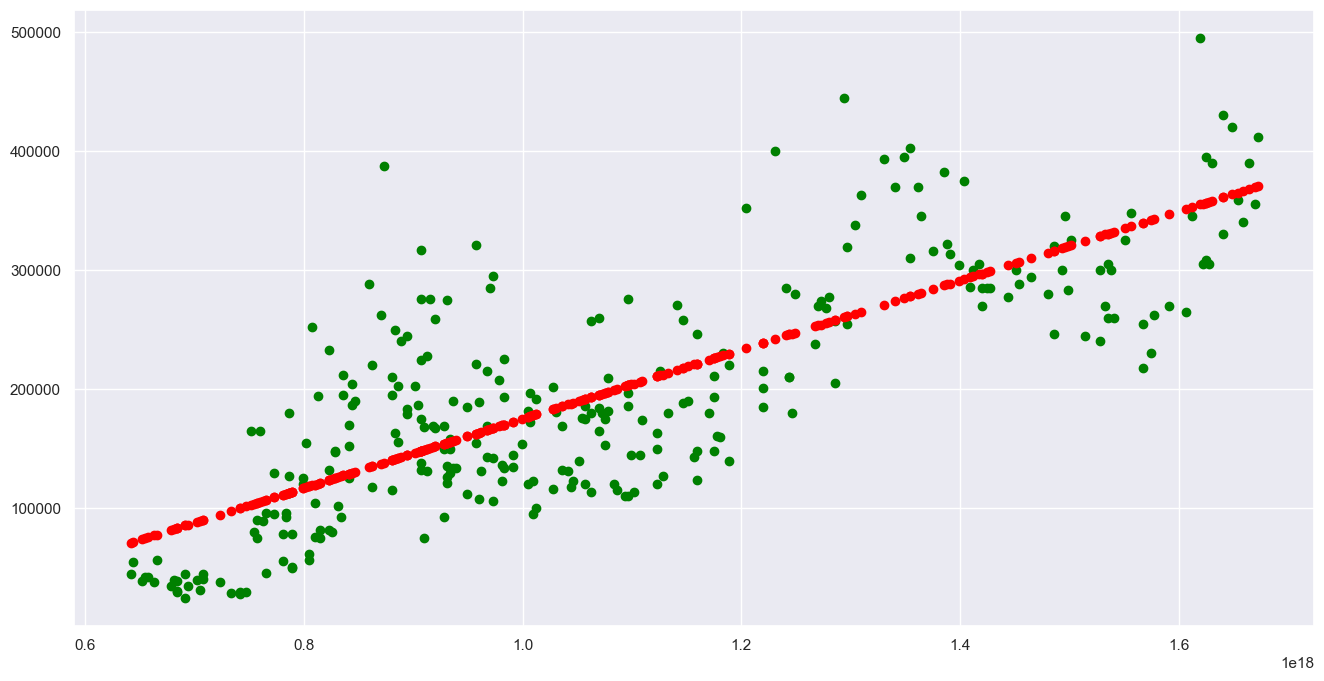

In [28]:
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

In [29]:
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Mean Squared Error (MSE) 	: 3677241638.020197


In [30]:
def univariateLinearRegression(Xvar = None, yvar = None, df = None):
      
    y = pd.DataFrame(df[yvar])
    X = pd.DataFrame(df[Xvar])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linreg = LinearRegression()         
    linreg.fit(X_train, y_train)        

    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    print("Prediction Accuracy of Model \tTest Dataset")
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

In [58]:
targetData = blkcopy[['date', 'resale_price']].copy()
targetData = targetData.reset_index(drop=True)
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

rule.sum()


date             0
resale_price    19
dtype: int64

# Boxplot

<AxesSubplot:>

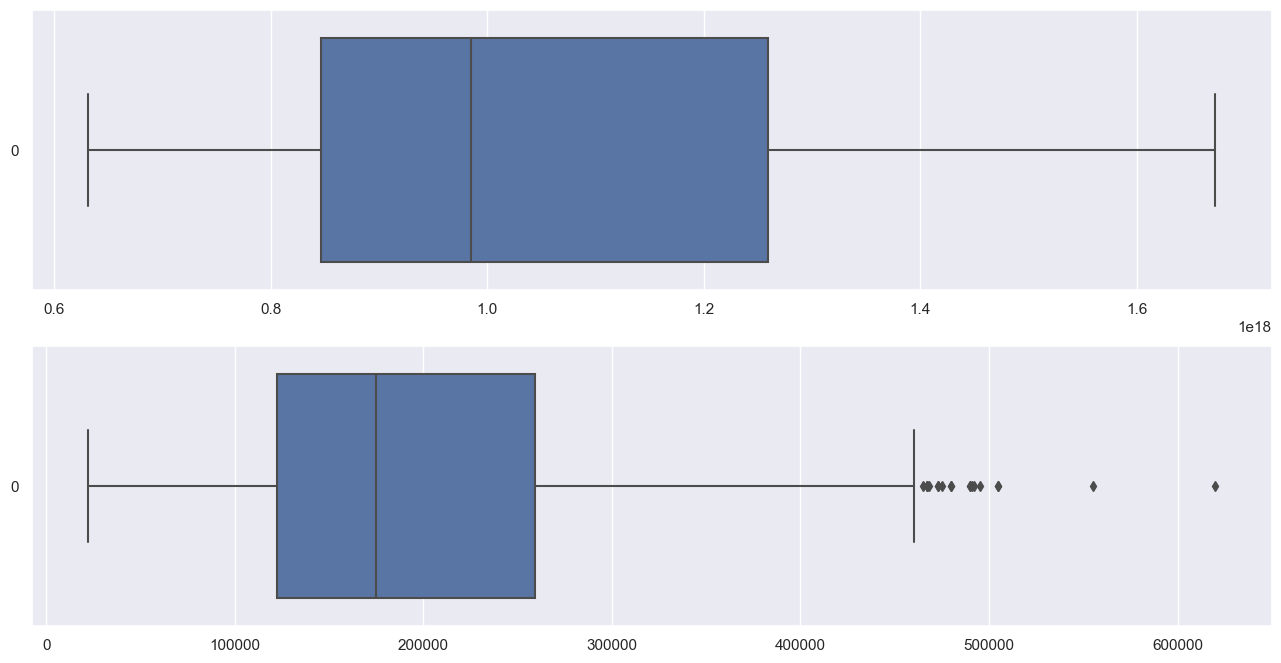

In [60]:
f, axes = plt.subplots(2, 1, figsize=(16, 8))

sb.boxplot(data=targetData["date"], orient="h", ax=axes[0])
sb.boxplot(data=targetData["resale_price"], orient="h", ax=axes[1])


In [39]:
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

rule

,date,resale_price
152,False,False
1225,False,False
1460,False,False
1615,False,False
2247,False,False
...,...,...
889483,False,False
891526,False,False
891531,False,False
891535,False,False


In [40]:
outliers = rule.any(axis = 1)   

outliers

152       False
1225      False
1460      False
1615      False
2247      False
          ...  
889483    False
891526    False
891531    False
891535    False
891986    False
Length: 1450, dtype: bool

In [41]:
outliers.value_counts()

False    1431
True       19
dtype: int64

In [42]:
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([642734, 644735, 649987, 649988, 673238, 691667, 714427, 732435,
            753768, 762777, 762779, 778439, 794287, 804072, 857194, 857338,
            858288, 866825, 877892],
           dtype='int64')

In [43]:
targetData.drop(axis = 0,               
                index = outlierindices, 
                inplace = True)          

targetData

,date,resale_price
152,631152000000000000,26000.0
1225,631152000000000000,52000.0
1460,631152000000000000,33000.0
1615,633830400000000000,31200.0
2247,633830400000000000,45000.0
...,...,...
889483,1669852800000000000,360000.0
891526,1672531200000000000,412000.0
891531,1672531200000000000,432000.0
891535,1672531200000000000,410000.0


# UniVariate Linear regression

Intercept 	: b =  [-104613.10133045]
Coefficients 	: a =  [[2.77372108e-13]]


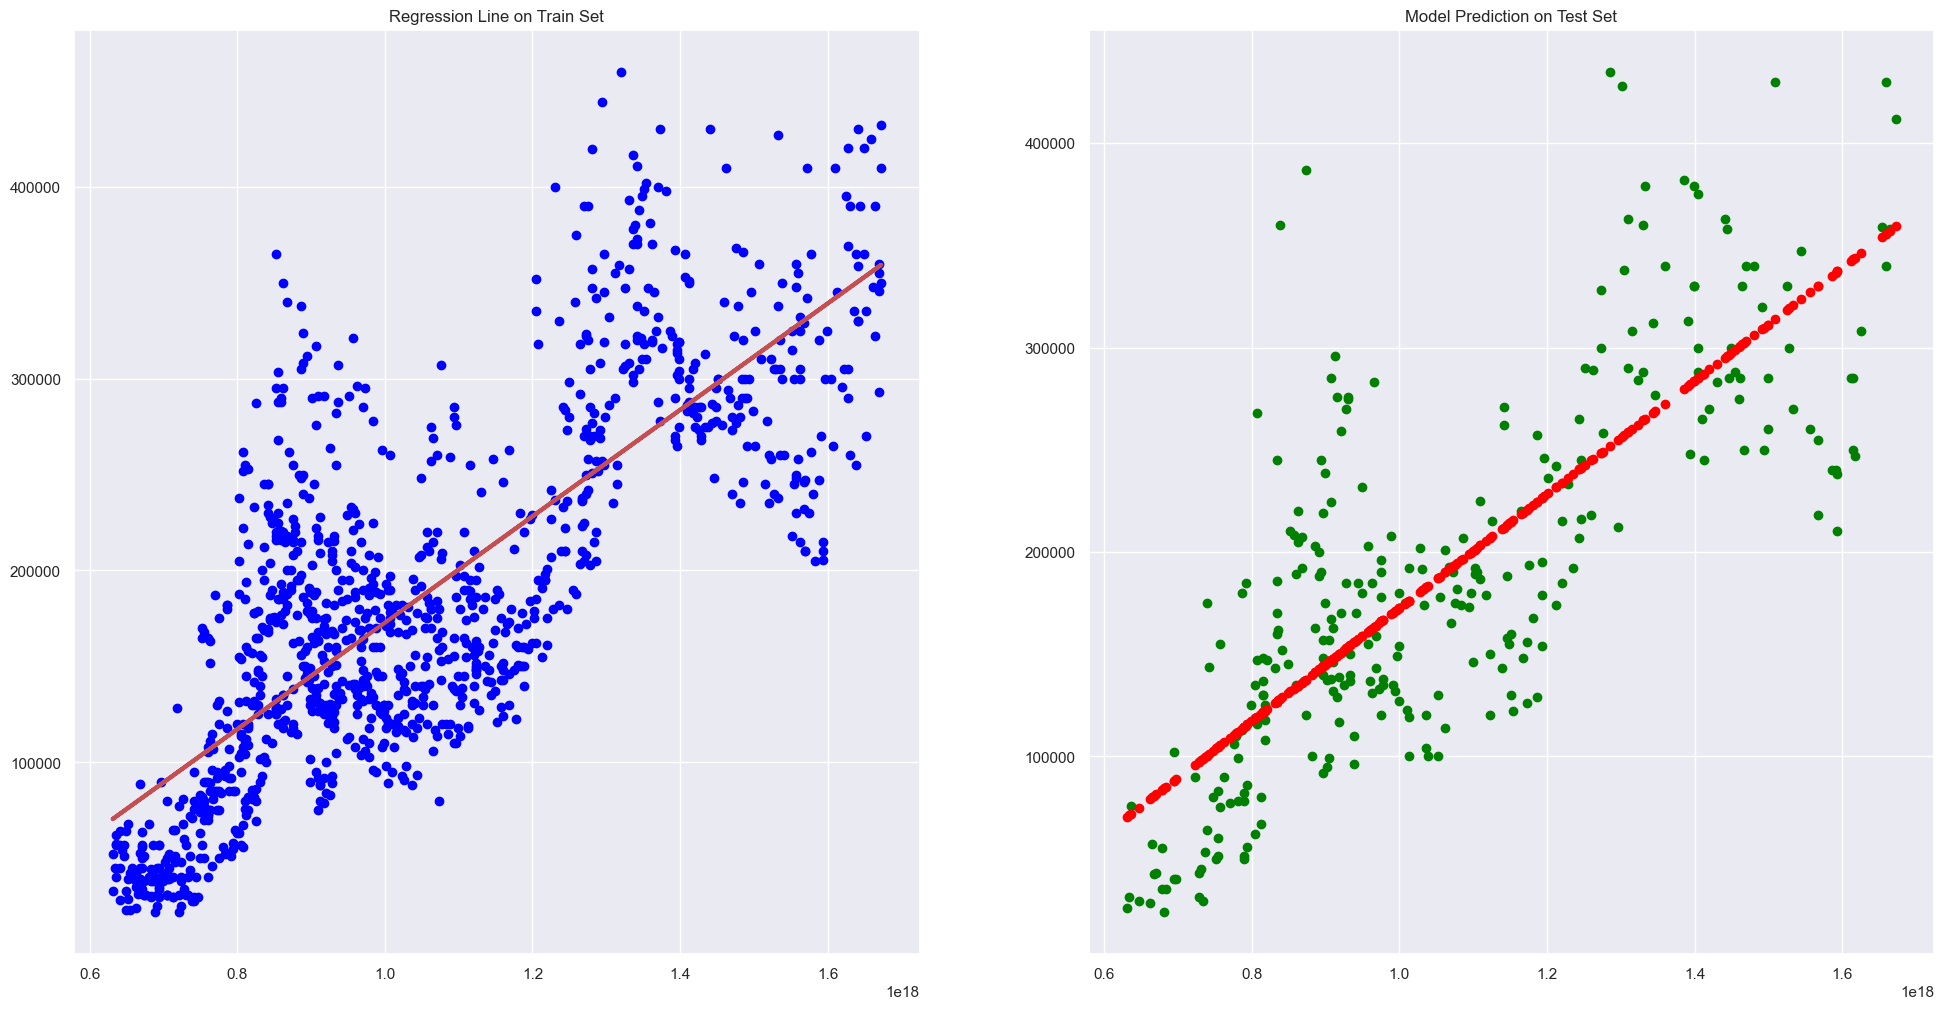

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.612660299078758
Mean Squared Error (MSE) 	: 3467382978.0560756

Prediction Accuracy of Model 	Test Dataset
Mean Squared Error (MSE) 	: 3397436602.4665294



In [44]:
univariateLinearRegression(Xvar = "date", yvar = "resale_price", df = targetData)